Create Summary Statistic Graphs for Co-Design

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('data/roxbury405March5_24Raw.csv')
df['timestamp'] = pd.to_datetime(df['timestamp']) #convert timestamp to datetime type


In [13]:
df.head()

,timestamp,sample_pres,pm1,sn,timestamp_local,pm25_model_id,pm1_model_id,sample_temp,id,device_state,pm10_model_id,sample_rh,pm25,pm10
0,2022-03-23 23:59:53+00:00,0.0,0.8210,MOD-PM-00218,2022-03-23T19:59:53Z,2906,2905,7.99,102094389,ACTIVE,2907,40.45,1.8549,3.0875
1,2022-03-23 23:58:53+00:00,0.0,0.9690,MOD-PM-00218,2022-03-23T19:58:53Z,2906,2905,7.99,102092498,ACTIVE,2907,40.34,1.6386,2.9826
2,2022-03-23 23:57:53+00:00,0.0,0.8466,MOD-PM-00218,2022-03-23T19:57:53Z,2906,2905,8.00,102092495,ACTIVE,2907,40.58,1.3133,3.2080
3,2022-03-23 23:56:53+00:00,0.0,1.0110,MOD-PM-00218,2022-03-23T19:56:53Z,2906,2905,8.00,102092494,ACTIVE,2907,41.10,1.7074,4.6153
4,2022-03-23 23:55:53+00:00,0.0,0.4499,MOD-PM-00218,2022-03-23T19:55:53Z,2906,2905,7.99,102092493,ACTIVE,2907,40.78,0.9211,0.9588


In [4]:
df_agg = df.groupby([df['timestamp'].dt.date], sort = False).agg({'pm1': {'mean', 'max'}, 'pm25': {'mean', 'max'}, 'pm10': {'mean', 'max'}})
# reanme columns
df_agg.columns = ['pm1_mean', 'pm1_max', 'pm25_mean', 'pm25_max', 'pm10_mean', 'pm10_max']
df_agg = df_agg.reset_index()

df_agg.head()

,timestamp,pm1_mean,pm1_max,pm25_mean,pm25_max,pm10_mean,pm10_max
0,2022-03-23,0.968776,5.9480,1.543587,7.9526,4.527056,37.1670
1,2022-03-22,0.969169,7.8838,1.192138,8.2168,2.782090,17.2192
2,2022-03-21,0.885337,2.4521,1.076490,2.8767,2.318293,16.8850
3,2022-03-20,2.446818,10.7949,3.275461,12.5051,4.258223,27.4662
4,2022-03-19,5.766449,15.6149,7.794907,19.4660,10.412157,26.9869


EPA source for particle concentration standards: https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf

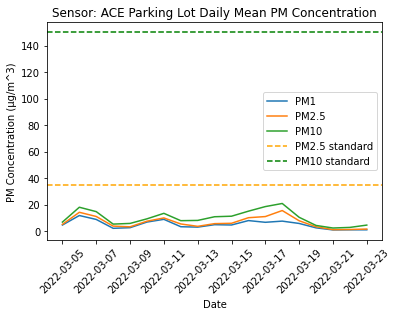

In [10]:
plt.plot(df_agg["timestamp"], df_agg["pm1_mean"], label = "PM1")
plt.plot(df_agg["timestamp"], df_agg["pm25_mean"], label = "PM2.5")
plt.plot(df_agg["timestamp"], df_agg["pm10_mean"], label = "PM10")
plt.axhline(y = 35, color = "orange", linestyle = '--', label = "PM2.5 standard") #24 hr standard for pm2.5 
plt.axhline(y = 150, color = "g", linestyle = '--', label = "PM10 standard") #24 hr standard for pm2.5 
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("PM Concentration (µg/m^3)")
plt.title("Sensor: ACE Parking Lot Daily Mean PM Concentration")
plt.legend()
plt.savefig("fig/meanPmWithStandards.jpg", dpi = 300, bbox_inches = "tight")
plt.show()


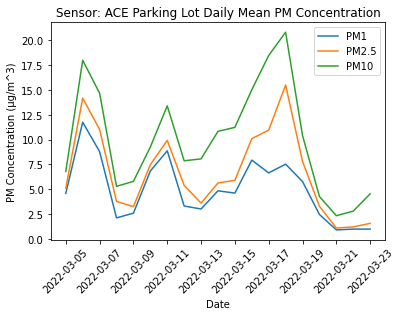

In [11]:
plt.plot(df_agg["timestamp"], df_agg["pm1_mean"], label = "PM1")
plt.plot(df_agg["timestamp"], df_agg["pm25_mean"], label = "PM2.5")
plt.plot(df_agg["timestamp"], df_agg["pm10_mean"], label = "PM10")
# plt.axhline(y = 35, color = "orange", linestyle = '--', label = "PM2.5 standard") #24 hr standard for pm2.5 
# plt.axhline(y = 150, color = "g", linestyle = '--', label = "PM10 standard") #24 hr standard for pm2.5 
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("PM Concentration (µg/m^3)")
plt.title("Sensor: ACE Parking Lot Daily Mean PM Concentration")
plt.legend()
plt.savefig("fig/meanPm.jpg", dpi = 300, bbox_inches = "tight")
plt.show()

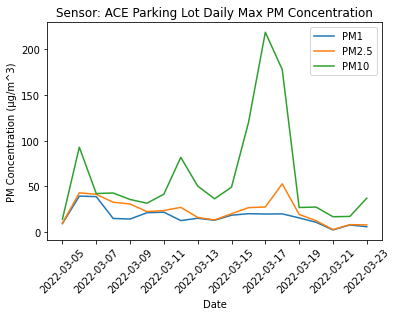

In [12]:
plt.plot(df_agg["timestamp"], df_agg["pm1_max"], label = "PM1")
plt.plot(df_agg["timestamp"], df_agg["pm25_max"], label = "PM2.5")
plt.plot(df_agg["timestamp"], df_agg["pm10_max"], label = "PM10")
# plt.axhline(y = 35, color = "orange", linestyle = '--', label = "PM2.5 standard") #24 hr standard for pm2.5 
# plt.axhline(y = 150, color = "g", linestyle = '--', label = "PM10 standard") #24 hr standard for pm2.5 
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("PM Concentration (µg/m^3)")
plt.title("Sensor: ACE Parking Lot Daily Max PM Concentration")
plt.legend()
plt.savefig("fig/maxPm.jpg", dpi = 300, bbox_inches = "tight")
plt.show()